# 2. Hybrid Thermal plus Power-Law Gyrosynchrotron Model

## 2.1. Notebook setup

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## 2.2. <a href="https://www.dropbox.com/s/tncsi8bhi4twznz/hybrid_model.zip?dl=`">Download data</a>

Unzip the contents into a folder named <font color='green'>data</font> in the same level as the notebooks folder. The directory structure should end up looking like the following: 
```
thermal-gs
├── data
│   ├── thermal-gs.mplstyle
│   ├── thermal-power.txt
│   ├── ...
├── figures
│   ├── thermal-power-gs.pdf
│   ├── thermal-power-gs.png
│   ├── ...
├── notebooks
│   ├── hybrid_model.ipynb
│   ├── ...
.
.
.

## 2.3. Load

In [2]:
freq, I_pwr, V_pwr, I_th, V_th = np.loadtxt('../data/thermal-power.txt', unpack=True)
plt.style.use('../data/thermal-gs.mplstyle')

## 2.4. Plot

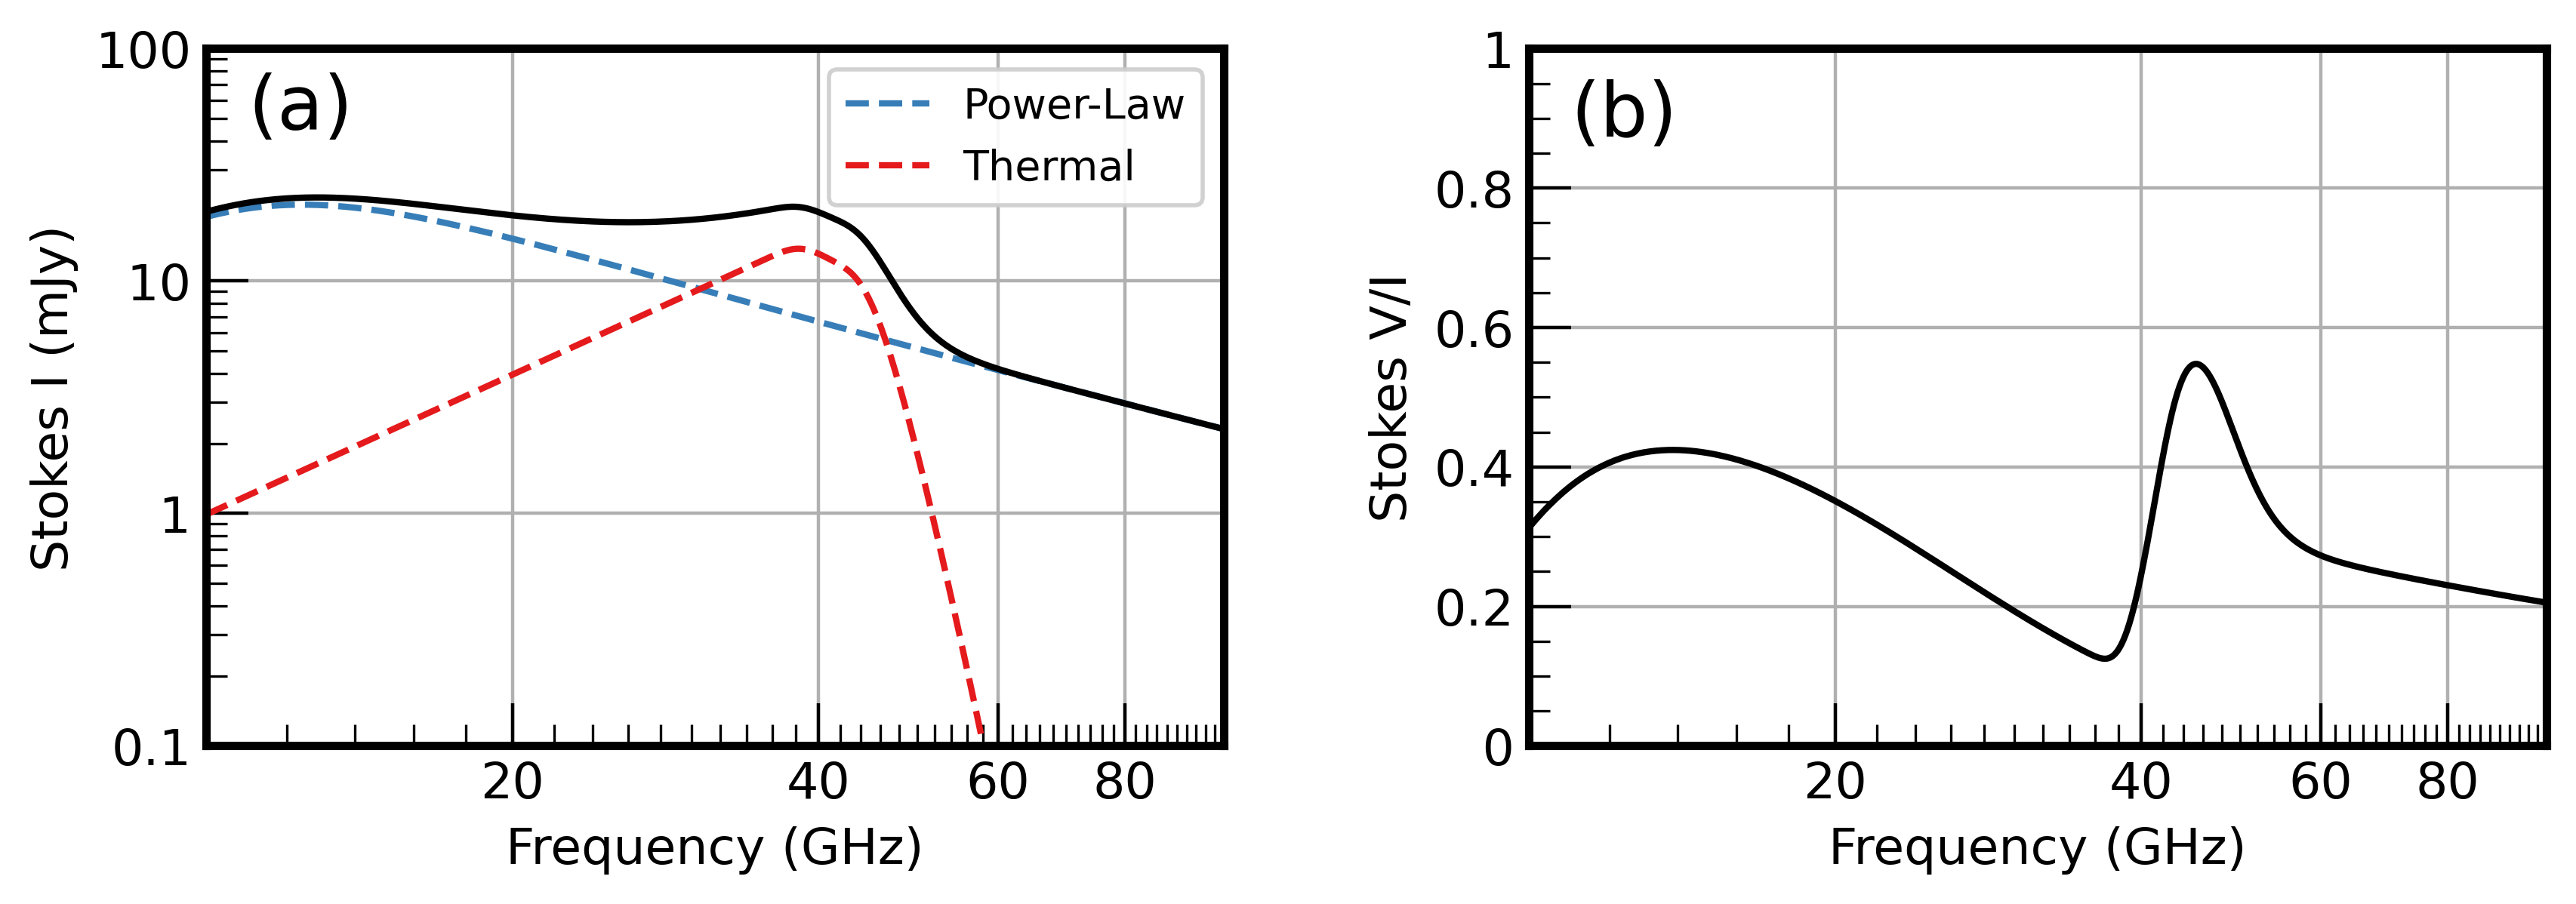

In [3]:
fig,ax = plt.subplots(1, 2, figsize=(10, 3))
fig.subplots_adjust(hspace=0.1, wspace=0.3)

# Stokes I  
ax[0].set_xlabel('Frequency (GHz)')
ax[0].set_ylabel('Stokes I (mJy)')
ax[0].set_xlim(10, 100)
ax[0].set_ylim(0.1, 100)

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%i'))
ax[0].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax[0].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[0].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[2, 4, 6, 8]))
ax[0].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(10, 100, 2)))
ax[0].yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=4))
ax[0].yaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=40, subs=np.arange(1, 10)*0.1))
ax[0].grid()

ax[0].plot(freq, I_pwr, linestyle='--', label='Power-Law')
ax[0].plot(freq, I_th, linestyle='--', label='Thermal')
ax[0].plot(freq, I_pwr+I_th, color='black')

# Stokes V/I
ax[1].set_xlabel('Frequency (GHz)')
ax[1].set_ylabel('Stokes V/I')
ax[1].set_xlim(10, 100)
ax[1].set_ylim(0, 1)

ax[1].set_xscale('log')
ax[1].xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax[1].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[1].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax[1].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[1].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[2, 4, 6, 8]))
ax[1].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(10, 100, 2)))
ax[1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax[1].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax[1].grid()

ax[1].plot(freq, (V_pwr+V_th)/(I_pwr+I_th), color='black')

# Final setup
ax[0].legend(loc=1)
ax[0].text(11, 45, '(a)', fontsize=18) 
ax[1].text(11, 0.875, '(b)', fontsize=18)

fig.set_facecolor('white')
plt.savefig('../figures/thermal-power-gs.png', bbox_inches='tight')
plt.savefig('../figures/thermal-power-gs.pdf', bbox_inches='tight')
plt.show()